## First step: Import numpy library and matplotlib library functions. Use numpy command and shorten it as np.

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
import numpy as np

## Second step: Reading file by use r command.

In [27]:
def GeomListDataReader(File):
    xy = []   # [] in here means tuple.
    inputdata = open(File, 'r')
    for line in inputdata.readlines():  # Input data by use readline command.
        line = line.split()
        xy.append((float(line[0]), float(line[1])))
    return xy
   
GeometricDataReader('Scatter3.txt')  # Implementing a function to readpoint

[(20.19445914, 1.533629736),
 (21.31637731, 5.408446831),
 (22.01454667, 5.917552032),
 (25.40423855, 7.60320187),
 (26.93616819, 9.331091905),
 (27.26686869, 10.47948905),
 (26.47693372, 10.33397189),
 (28.2906279, 10.40149358),
 (28.38190266, 11.26142313),
 (31.11781403, 12.00763268),
 (30.62339422, 12.53582962),
 (31.83411243, 13.03816712),
 (33.11280821, 12.82270948),
 (35.78687895, 13.50722266),
 (35.89817543, 13.2712234),
 (35.12697407, 14.19850344),
 (36.51100361, 13.48165741),
 (39.31902147, 13.57791636),
 (39.17732499, 15.17705925),
 (40.18720359, 14.8652981),
 (41.54445481, 15.53644249),
 (41.03094759, 15.49583428),
 (42.33645392, 14.7111924),
 (45.19070766, 16.0428675),
 (45.54156154, 16.91504133),
 (45.39385016, 15.92769232),
 (48.67214679, 16.41328121),
 (48.6203467, 16.75485305),
 (48.43455335, 17.34821883),
 (51.15702406, 16.97475516)]

## Third step: Extend list class.

In [39]:
class GeomList(list):
    def __setitem__ ( self ,i ,geom):
        assert isinstance(geom,Point2D)  # make sure geo is point2D class
        super(). __setitem__ (i ,geom)
    def insert ( self, i ,geom):
        assert isinstance(geom,Point2D)
        super(). insert (i ,geom)
    def append ( self ,geom):
        assert isinstance(geom,Point2D)
        super(). append (geom)
        
    def move(self, x, y):  # make move function implementing
        for point in self:
            point.move(x, y)
            
    def plot(self): # make plot function implementing
        for point in self:
            point.plot()
            
    def copy(self):
        return self
    
    def linRegression(self, n):
        xList = []
        yList = []
        for point in self:
            xList.append(point.x)
            yList.append(point.y)
        orders = np.array(np.polyfit(xList, yList, n))
        p = np.poly1d(orders)
        pyplot.plot(xList,p(xList))  

## Fourth step: Define point2D class.

In [30]:
class Point2D:
    def __init__(self, data):
        self.x = data[0]
        self.y = data[1]
    def move(self, x, y):
        self.x += x
        self.y += y 
    def plot(self):
        pyplot.plot(self.x, self.y, "s", color = "blue")
    def copy(self):
        return Point2D((x, y))

## Fifth step: Implementing graph

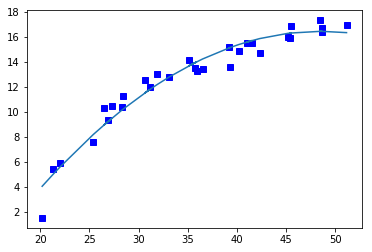

In [28]:
g = GeomListDataReader('Scatter3.txt')
geodata = GeomList()
for data in g:
    geodata.append(Point2D(data))

geodata.plot()
geodata.linRegression(2)
pyplot.show()

## Sixth step: Move graph

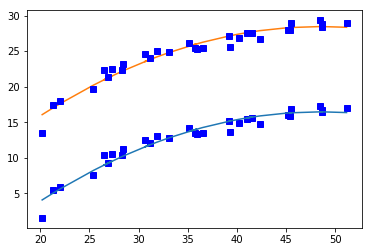

In [45]:
g = GeomListDataReader('Scatter3.txt')
geodata = GeomList()
for data in g:
    geodata.append(Point2D(data))

geodata.plot()
geodata.linRegression(2)
geodata.move(0, 12)
geodata.linRegression(2)
geodata.plot()
pyplot.show()